In [2]:
import pandas as pd
import sqlite3
import numpy as np
import matplotlib.pyplot as plt
import json

In [3]:
CONVERTED_DATABASE_NAME = '/Users/darylwilding-mcbride/Downloads/5cm_5minGrad_Mclass_C18D_plasma_001_frac01_1_1_1391/5cm_5minGrad_Mclass_C18D_plasma.sqlite'

In [4]:
MS1_CE = 10

In [5]:
db_conn = sqlite3.connect(CONVERTED_DATABASE_NAME)
ms1_frame_properties_df = pd.read_sql_query("select frame_id,retention_time_secs from frame_properties where collision_energy == {}".format(MS1_CE), db_conn)
db_conn.close()

In [6]:
# get the ms1 frame IDs
ms1_frame_ids = tuple(ms1_frame_properties_df.astype(int).values[:,0])

In [7]:
db_conn = sqlite3.connect(CONVERTED_DATABASE_NAME)
frame_intensity_df = pd.read_sql_query("select frame_id,sum(intensity),retention_time_secs from frames where frame_id in {} group by frame_id order by retention_time_secs".format(ms1_frame_ids), db_conn)
db_conn.close()

In [8]:
frame_intensity_df.head()

,frame_id,sum(intensity),retention_time_secs
0,1,1153380,0.588074
1,2,951543,0.736582
2,3,840421,0.867717
3,4,806233,0.998496
4,5,792562,1.128530


In [9]:
frame_intensity_df.rename(columns={'sum(intensity)':'intensity'}, inplace=True)


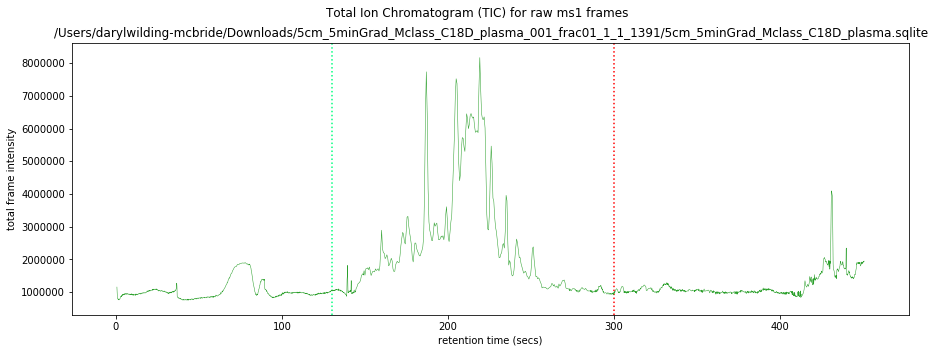

In [14]:
f, ax1 = plt.subplots()
f.set_figheight(5)
f.set_figwidth(15)
ax1.set_ylabel('total frame intensity')
ax1.set_xlabel('retention time (secs)')
plt.axvline(x=130, linestyle=':', color='springgreen')
plt.axvline(x=300, linestyle=':', color='red')
ax1.plot(frame_intensity_df.retention_time_secs, frame_intensity_df.intensity, marker='', linestyle='-', linewidth=0.5, ms=2, color='tab:green', label='frame')
plt.margins(0.06)
plt.suptitle('Total Ion Chromatogram (TIC) for raw ms1 frames')
plt.title('{}'.format(CONVERTED_DATABASE_NAME))
plt.show()